In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import sys
sys.path.insert(0,'../GSHEWaveform/')

import forecast as fc

from importlib import reload

In [2]:
def latex_exp(x, exp_min = (0,0),ndec=2):
    if x == 0:
        return '%g'%x
    expon = np.log10(x)
    expon = np.floor(expon) if expon>0 else np.ceil(expon)
    if expon>=exp_min[0] and expon<=exp_min[1]:
        ndec = max(ndec,exp_min[1] if expon>0 else -exp_min[0])
#         print('*',x)
        form = '%.'+('%i'%ndec)+'f'
#         print(form)
#         form = '%.'+form+'g'
        return form%x
    mant = x/10**expon
    if mant ==1:
#         print('.',x)
        return '10^{%i}'%(expon)
    else:
        form = '%.'+('%i'%ndec)+'f'
        return (form+'\cdot 10^{%i}')%(mant,expon)

latex_exp(1e2,exp_min=(-2,4)), latex_exp(0), latex_exp(1.2), latex_exp(1e-3,exp_min=(-3,4)),latex_exp(1.2345e-8)

('100.0000', '0', '1.20', '0.001', '0.12\\cdot 10^{-7}')

## GW catalogue & SNR

In [3]:
gwtc=pd.read_csv('/home/miguel/code/notebooks/gw_data/GWTC.csv')

In [4]:
# print(gwtc)

(array([ 3., 15., 16., 18., 11., 10.,  4.,  3.,  4.,  1.,  3.,  0.,  0.,
         0.,  3.,  1.,  0.,  0.,  0.,  1.]),
 array([ 6.  ,  7.35,  8.7 , 10.05, 11.4 , 12.75, 14.1 , 15.45, 16.8 ,
        18.15, 19.5 , 20.85, 22.2 , 23.55, 24.9 , 26.25, 27.6 , 28.95,
        30.3 , 31.65, 33.  ]),
 <BarContainer object of 20 artists>)

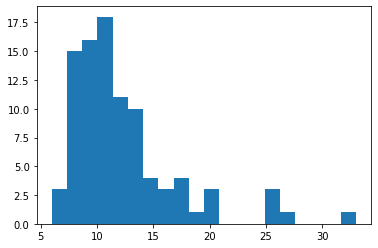

In [5]:
#look at the SNR distribution
plt.hist(gwtc['network_matched_filter_snr'],20)

(array([11., 12., 16., 29., 11.,  2.,  5.,  0.,  2.,  2.]),
 array([  1.46 ,  11.864,  22.268,  32.672,  43.076,  53.48 ,  63.884,
         74.288,  84.692,  95.096, 105.5  ]),
 <BarContainer object of 10 artists>)

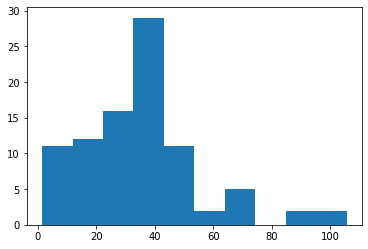

In [6]:
plt.hist(gwtc['mass_1_source'])

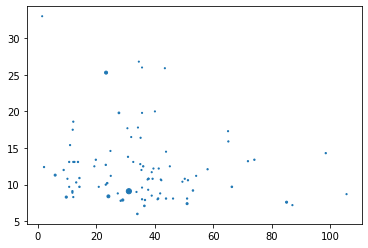

In [6]:
plt.scatter(gwtc['mass_1_source'],gwtc['network_matched_filter_snr'],s=gwtc['mass_1_source']/gwtc['mass_2_source'])

In [7]:
dat = (gwtc['mass_1_source'][np.isfinite(gwtc['mass_1_source'])])
np.median(dat), np.mean(dat)

(35.25, 35.05177777777778)

## Import $\Upsilon_{\rm obs}(\beta_{\rm min},\mu_{\rm min})$

In [253]:
#Load the data (computed in )

case = '5_all'

data_dict = np.load("../data/Ups_obs_mu_min_%s.npy"%case, allow_pickle=True).item()
betalims = data_dict["betalims"]
mu_min_arr = data_dict["mu_min_arr"]
ups_obs_arr = data_dict["ups_obs_arr"]

<ipython-input-254-bf49749329ca>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


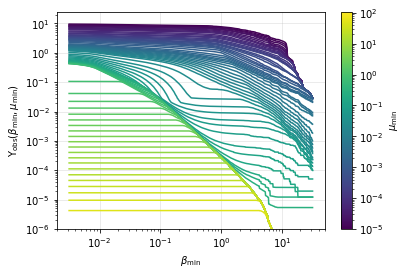

In [254]:
import matplotlib.colors as colors

ups_obs_arr = np.array(ups_obs_arr)


fig, ax = plt.subplots()
lines = []

mu_min_norm = colors.LogNorm(vmin=min(mu_min_arr), vmax=max(mu_min_arr))
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=mu_min_norm, cmap='viridis'), ax=ax)
cmap = plt.cm.get_cmap('viridis')

for i, mu_min in enumerate(mu_min_arr):
    line, = ax.loglog(betalims, ups_obs_arr[i, :], c=cmap(mu_min_norm(mu_min)))
    lines.append(line)

cbar.set_label(r'$\mu_{\rm min}$')



ax.set_ylabel(r"$\Upsilon_{\rm obs}(\beta_{\rm min},\mu_{\rm min})$")
ax.set_xlabel(r"$\beta_{\rm min}$")

ax.grid(alpha=0.3)
ax.set_ylim(1e-6,)
plt.show()

fig.tight_layout()
if True:
    fig.savefig("../plots/ups_obs_magnif_%s.pdf"%case, dpi=450)

loaded Ups_obs_mu_min_500_all.npy


<ipython-input-14-bb893770c7ab>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


Text(0.5, 0, '$\\beta_{\\rm min}$')

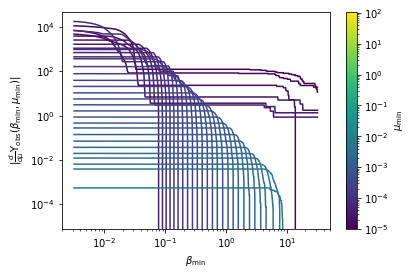

In [14]:
reload(fc)

case = '500_all'
fc.load_data('Ups_obs_mu_min_%s.npy'%case)

#fill an array
dups_obs_dmu = fc.compute_d_ups_obs_dmu(fc.ups_obs_arr,fc.mu_min_arr)

fig, ax = plt.subplots()
lines = []

mu_min_norm = colors.LogNorm(vmin=min(mu_min_arr), vmax=max(mu_min_arr))
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=mu_min_norm, cmap='viridis'), ax=ax)
cmap = plt.cm.get_cmap('viridis')

for i in range(0,len(mu_min_arr)-1):

    mu_min = mu_min_arr[i]
    line, = ax.loglog(betalims, np.abs(dups_obs_dmu[i,:]), c=cmap(mu_min_norm(mu_min)))
    lines.append(line)

cbar.set_label(r'$\mu_{\rm min}$')

ax.set_ylabel(r"$|\frac{d}{d\mu} \Upsilon_{\rm obs}(\beta_{\rm min},\mu_{\rm min})|$")
ax.set_xlabel(r"$\beta_{\rm min}$")

In [ ]:
fc.load_data('Ups_obs_mu_min_%s.npy'%case)

Generalizing the previous expression we have the following detection probability

$$p_i = f(M,r_{\rm src}) \int d\mu \mu^{3/2} \frac{d\Upsilon_{\rm Obs}}{d\mu}(\beta^i_{\rm ex}(M),r_{\rm src},\mu) = \frac{3}{2}f(M,r_{\rm src}) \int d\mu \mu^{1/2} \Upsilon_{\rm Obs}(\beta^i_{\rm ex}(M),r_{\rm src},\mu)$$

Notes:
* $\mu^{3/2}$ is a volume prior: very demagnified events are detectable, but they'd have to be very close to us (at observed SNR)
* the second expression follows by partial integration, so we can work with $\Upsilon_{\rm Obs}$
* we're allowing for arbitrary many loops (this can be reduced)
* we're considering the images individually

Going forward:
* figure out scaling with $r_{\rm src}$
* given $r_{\rm src},M$, interpolate on $\beta(M), r_{\rm src}$ for all the available $\mu$'s. Then do the magnification integral through array

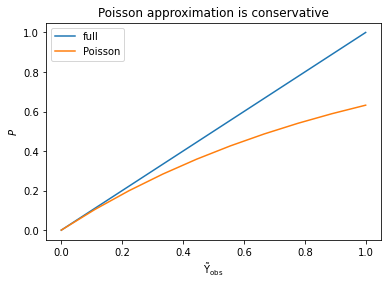

In [15]:
x = np.linspace(0,1,10)
plt.plot(x,x,label='full')
plt.plot(x,1-np.exp(-x),label='Poisson')
plt.title('Poisson approximation is conservative')
plt.xlabel(r'$\tilde \Upsilon_{\rm obs}$')
plt.ylabel(r'$P$')
plt.legend()

## Mismatch

We will use a simple criterion for detectability when $\mathcal{M}\cdot {\rm SNR}^2>1$ to estimate the number of detectable signals.

If we use our scaling as $\beta^2$ (for small $\beta$) then we can obtain the limit $\beta< \frac{\beta_0}{ \sqrt{\mathcal{M_0}} {\rm SNR}}$

/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:132: RuntimeWarning: divide by zero encountered in divide
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:132: RuntimeWarning: invalid value encountered in divide
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:132: RuntimeWarning: invalid value encountered in exp
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:132: RuntimeWarning: divide by zero encountered in divide
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:132: RuntimeWarning: invalid value encountered in divide
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:132: RuntimeWarning: invalid value encountered in exp
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))


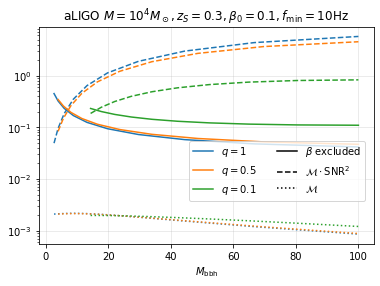

In [16]:
m_min = 1.3
bt_fid = 0.1
zS = 0.3
for i,q in enumerate([1,0.5,0.1]):
    Mbbh = np.geomspace(m_min*(1+1/q),100,10)
    dat = [fc.mismatch_gshe(M,q=q,fmin=10,bt_fid=bt_fid,z=zS,psd_fun=fc.psd_ligo) for M in Mbbh]
    dat = np.array(dat)
    plt.semilogy(Mbbh,dat[:,0]*dat[:,1]**2,'--',c='C%i'%i)
    plt.plot(Mbbh,dat[:,0],':',c='C%i'%i)
    plt.plot(Mbbh,bt_fid/np.sqrt(dat[:,0])/dat[:,1],'-',label='$q=%g$'%q,c='C%i'%i)
    
plt.plot([],'k-',label=r'$\beta$ excluded')
plt.plot([],'k--',label=r'$\mathcal{M}\cdot{\rm SNR}^2$')
plt.plot([],'k:',label=r'$\mathcal{M}$')
    
plt.legend(ncol=2,loc=(0.45,0.2))
plt.xlabel(r"$M_{\rm bbh}$")
plt.title(r"aLIGO $M=10^4M_\odot, z_S=%g,\beta_0 =%g,f_{\rm min}=10$Hz"%(zS,bt_fid))
plt.grid(alpha=0.3)

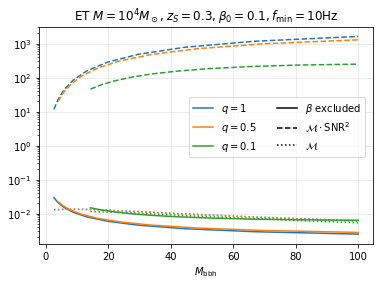

In [17]:
m_min = 1.3
bt_fid = 0.1
zS = 0.3
for i,q in enumerate([1,0.5,0.1]):
    Mbbh = np.geomspace(m_min*(1+1/q),100,10)
    dat = [fc.mismatch_gshe(M,q=q,fmin=10,bt_fid=bt_fid,z=zS,psd_fun=fc.psd_et) for M in Mbbh]
    dat = np.array(dat)
    plt.semilogy(Mbbh,dat[:,0]*dat[:,1]**2,'--',c='C%i'%i)
    plt.plot(Mbbh,dat[:,0],':',c='C%i'%i)
    plt.plot(Mbbh,bt_fid/np.sqrt(dat[:,0])/dat[:,1],'-',label='$q=%g$'%q,c='C%i'%i)
    
plt.plot([],'k-',label=r'$\beta$ excluded')
plt.plot([],'k--',label=r'$\mathcal{M}\cdot{\rm SNR}^2$')
plt.plot([],'k:',label=r'$\mathcal{M}$')
    
plt.legend(ncol=2,loc=(0.45,0.4))
plt.xlabel(r"$M_{\rm bbh}$")
plt.title(r"ET $M=10^4M_\odot, z_S=%g,\beta_0 =%g,f_{\rm min}=10$Hz"%(zS,bt_fid))
plt.grid(alpha=0.3)

## Number of sources

Using https://github.com/hsinyuc/distancetool

Output--
Range (Mpc);
Redshift at which the detector can detect 50% of the uniformly distributed sources;
Redshift at which the detector can detect 10% of the uniformly distributed sources;
Redshift of the horizon;
Constant comoving time volume (Gpc^3);
Redshift within which 50% of the detected sources lie;
Redshift within which 90% of the detected sources lie;
Redshift within which 50% of the detected sources lie, the source distribution follows a star formation rate;
Redshift within which 90% of the detected sources lie, the source distribution follows a star formation rate;
Average redshift of the detected sources;
Average redshift of the detected sources, the source distribution follows a star formation rate.



The quantity is the comoving time volume. However, it is more convenient to include a function x(D) that accounts for the fraction of detected events at distance D

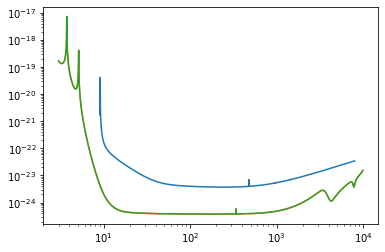

In [15]:
reload(fc)
for f in [fc.aligo_file,fc.CE1_file,fc.CE2_file]:
    d = np.genfromtxt(f)
    plt.loglog(d[:,0],d[:,1])

In [16]:
plt.plot(out['z_array'],out['compensate_det_frac_array'],label='det fraction')
plt.semilogy(out['z_array'],out['unit_volume_arrayMpc3']/1e9,label='d volume [1/Gpc]')
plt.grid(alpha=0.3)
plt.ylim(1e-4,)
plt.xlabel('z')
plt.legend()

NameError: name 'out' is not defined

In [ ]:
V = cosmo.comoving_volume(out['z_array'])/u.Mpc**3
dV = np.gradient(V,out['z_array'])

plt.semilogy(out['z_array'],out['unit_volume_arrayMpc3'],label='d volume')

volume_det = (4*np.pi*u.sr*cosmo.differential_comoving_volume(out['z_array'])/(1+out['z_array'])*out['compensate_det_frac_array']/u.Mpc**3).decompose()

plt.semilogy(out['z_array'],volume_det)
plt.semilogy(out['z_array'],dV/(1+out['z_array'])*out['compensate_det_frac_array'])
plt.grid(alpha=0.3)

print(np.average(volume_det/out['unit_volume_arrayMpc3']*1e9),100*np.pi)

plt.title('differential volume not matching! ')

In [ ]:
z = np.geomspace(0.1,10,50)

V1 = cosmo.comoving_volume(z)/u.Mpc
V2 = gwhor.de.comoving_volume_de(z,**gwhor.cosmo)

#plt.loglog(z,V1); plt.loglog(z,V2)

plt.plot(z,V1/V2)
plt.title('but comoving volumes agree!')


In [ ]:
#trying to debug

m1 = 30
m2 = 30

snr_th = 8

fmin=10.
fref=10.
df=1.
maximum_freq = 1e3
approx = gwhor.ls.IMRPhenomD



n_zstep=400

asdfile = '/home/miguel/code/utils/distancetool/data/aLIGO/Advanced_LIGO_Design.txt'


z_hor = fc.guess_z_horizon(m1,m2, asdfile, snr_th = 8,fmin=10.,fref=10.,df=1.,maximum_freq = 1e3,approx = gwhor.ls.IMRPhenomD)

input_freq,strain=np.loadtxt(asdfile,unpack=True,usecols=[0,1])
print(min(input_freq))
minimum_freq=np.maximum(min(input_freq),fmin)
maximum_freq=np.minimum(max(input_freq),5000.)
interpolate_psd = interp1d(input_freq, strain**2)


z,dz=np.linspace(z_hor,0,n_zstep,endpoint=False,retstep=True)
dz=abs(dz)
unit_volume=np.zeros(np.size(z)); compensate_detect_frac=np.zeros(np.size(z))
for i in range(0,np.size(z)):	
    hplus_tilda,hcross_tilda,freqs = gwhor.get_htildas((1.+z[i])*m1,(1.+z[i])*m2, gwhor.de.luminosity_distance_de(z[i],**gwhor.cosmo) ,fmin=fmin,fref=fref,df=df,approx=approx)
    fsel = np.logical_and(freqs>minimum_freq,freqs<maximum_freq)
    psd_interp = interpolate_psd(freqs[fsel])  
    optsnr_z= gwhor.compute_horizonSNR(hplus_tilda,psd_interp,fsel,df)
    w=snr_th/optsnr_z
    compensate_detect_frac[i]=fc.prob_detect(w)		
    unit_volume[i]=(gwhor.de.comoving_volume_de(z[i]+dz/2.,**gwhor.cosmo)-gwhor.de.comoving_volume_de(z[i]-dz/2.,**gwhor.cosmo))/(1.+z[i])*fc.prob_detect(w)

### Compute fraction of events at a given distance

$w = {\rm SNR}_{\rm opt}/{\rm SNR}_{\rm thr}$, probability of detection given by $P(w)$

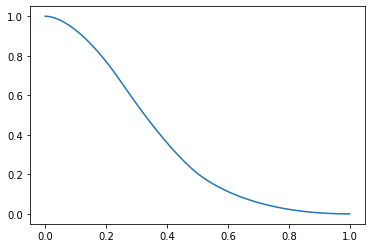

In [79]:
plt.plot(fc.w_sample,fc.P_sample)
# plt.plot(fc.w_sample,fc.dP_sample)

[0.71716315 0.32694025 0.08204463]
median w = 0.32694


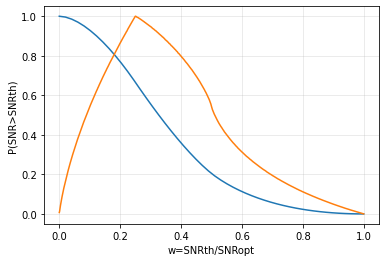

In [93]:
w = np.linspace(0,1)
pdet = fc.prob_detect(w)

plt.plot(w,pdet)
plt.xlabel('w=SNRth/SNRopt')
plt.ylabel('P(SNR>SNRth)')
plt.grid(alpha=0.3)

from scipy.integrate import cumtrapz
from scipy.interpolate import griddata
plt.plot(fc.w_sample,fc.dP_sample/(fc.dP_sample.min()))
# plt.plot(w,np.gradient(pdet,w))
# plt.plot(w,Pcum/Pcum[-1])
lims = griddata(pdet,w,[0.05,0.5,0.95])
print(lims)
print('median w = %g'%lims[1])

In [80]:
z_array = np.geomspace(1e-2,50,50)
SNR_opt_array = fc.SNR_opt(z_array,60,fc.aligo_file,q=1)

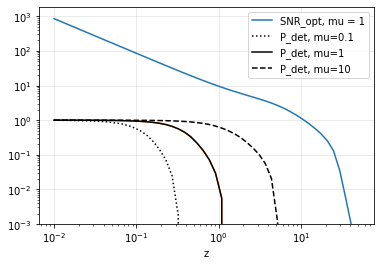

In [86]:
plt.loglog(z_array,SNR_opt_array,label='SNR_opt, mu = 1')
plt.loglog(z_array,fc.prob_detect(8/SNR_opt_array))

for mu,ls in zip([0.1,1,10],[':','-','--']):
    plt.loglog(z_array,fc.prob_detect(8/SNR_opt_array/np.sqrt(mu)),ls,c='k',label='P_det, mu=%g'%mu)

plt.ylim(1e-3,)
plt.grid(alpha=0.3)
plt.xlabel('z')
plt.legend()

## Number of detectable signals

$$ dN = f_{\rm C}(M,r_{\rm src})\int dz_s \frac{dV_z}{dz}(z_s)\mathcal{R}(z_s) \int d\mu P_{\rm det}\left(\frac{\rho_{\rm th}}{\sqrt{\mu}\rho_{\rm opt}(z_s)}\right) \frac{d P_{GSHE}}{d\mu}(\mu,\beta_{\rm min}(z_s,\mu))$$

$$ V_{\rm GSHE} = \int dz_s \frac{dV_z}{dz}(z_S) \int d\mu P_{\rm det}\left(\frac{\rho_{\rm th}}{\sqrt{\mu}\rho_{\rm opt}(z_S)}\right) \frac{d P_{GSHE}}{d\mu}(\mu,\beta_{\rm min}(z_s,\mu))$$

with $\beta_{\rm min} = \frac{\beta_{0}}{\sqrt{\mathcal{M}_0}}\frac{1}{0.327\sqrt{\mu}\rho}$ (the factor 0.327 translates the optimal SNR into a median SNR at $z_S$)

* **role of SNR below optimal on beta_min**
* **total number of events, magnification**

We will assume a constant rate $\mathcal{R}(z)=\mathcal{R}_0$ and quote the effective survey volume $V_{\rm GSHE}= \frac{N}{\mathcal{R}_0}$, for $\mathcal{R}$ constant

**SNR for $\beta_{\rm min}$**

In [17]:
#double integrals from https://stackoverflow.com/questions/20668689/integrating-2d-samples-on-a-rectangular-grid-using-scipy
from scipy.integrate import simps
import numpy as np
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 30)
z = np.cos(x[:,None])**4 + np.sin(y)**2
simps(simps(z, y), x)

0.8513409974325955

In [18]:
%%timeit
fc.beta_min(60,z=10)

35 ms ± 6.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
for M_fid in [1e4,1e5]:
    print(fc.mismatch_gshe(60, q,M_fid=M_fid), fc.beta_min(60,0.5,M_fid=M_fid))

[0.0016025004791563324, 21.25587344982419] 0.08584120755549743
[1.6061005905565473e-05, 21.25587344982419] 0.8573120673485289


### Prescription for different radii

Find a function that rescales the probability and the magnification:
* for $\mu\gtrsim 1$, $\Upsilon \propto 1/r^2$ because the Einstein Ring becomes smaller
* for $\mu\lesssim 1$ $\mu\propto 1/r^2$ because of magnification

Alternatively: redo the computation rescaling the size of the 

### Systematic plotting

In [339]:
reload(fc)

<module 'forecast' from '/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py'>

In [396]:
case_name = '10_all'
fc.load_data('Ups_obs_mu_min_%s.npy'%case_name)

In [408]:
cases = {'L-8-4': ['LIGO', 8, 60, 1e4, 30],
#          'L-8-4-20': ['LIGO', 8, 20, 1e4, 30],
#          'L-8-4-3': ['LIGO', 8, 3, 1e4, 30],
         'L-8-5': ['LIGO', 8, 60, 1e5, 30],
         'L-8-6': ['LIGO', 8, 60, 1e6, 30],
         'L-8-7': ['LIGO', 8, 60, 1e7, 30],
#          'L-1-4': ['LIGO', 1, 60, 1e4, 30],
#          'L-1-5': ['LIGO', 1, 60, 1e5, 30],
#          'L-1-6': ['LIGO', 1, 60, 1e6, 30],
         'C-8-4': ['CE', 8, 60, 1e4, 30],
#          'C-8-4-20': ['CE', 8, 20, 1e4, 30],
#          'C-8-4-3': ['CE', 8, 3, 1e4, 30],
         'C-8-5': ['CE', 8, 60, 1e5, 30],
         'C-8-6': ['CE', 8, 60, 1e6, 30],
#          'C-1-4': ['CE', 1, 60, 1e4, 30],
#          'C-1-5': ['CE', 1, 60, 1e5, 30],
#          'C-1-6': ['CE', 1, 60, 1e6, 30],
#          'L-1-7': ['LIGO', 1, 60, 1e7, 30],
         'C-8-7': ['CE', 8, 60, 1e7, 30],
#          'C-1-7': ['CE', 1, 60, 1e7, 30],
#         }

# cases = {
    'E-8-4': ['ET', 8, 60, 1e4, 30],
#          'E-8-4-20': ['ET', 8, 20, 1e4, 30],
#          'E-8-4-3': ['ET', 8, 3, 1e4, 30],
         'E-8-5': ['ET', 8, 60, 1e5, 30],
         'E-8-6': ['ET', 8, 60, 1e6, 30],
#          'E-1-4': ['ET', 1, 60, 1e4, 30],
#          'E-1-5': ['ET', 1, 60, 1e5, 30],
#          'E-1-6': ['ET', 1, 60, 1e6, 30],
#          'L-1-7': ['LIGO', 1, 60, 1e7, 30],
         'E-8-7': ['ET', 8, 60, 1e7, 30],
#          'E-1-7': ['ET', 1, 60, 1e7, 30],}
        }

GSHE_results = {}

for k in cases.keys():
    
    experiment, snr_th, M_bbh, M_fid, R0 = cases[k]
    psd, file = [fc.psd_CE, fc.CE1_file] if experiment == 'CE' else [fc.psd_ET,fc.ET_file] if experiment == 'ET' else [fc.psd_ligo, fc.aligo_file]
    zs = np.geomspace(0.001,60,50) if experiment in ['CE','ET'] else np.geomspace(0.001,50,30)
    
    output = fc.GSHE_rates(M_bbh,psd, file,return_arrays=True,snr_th=snr_th,M_fid=M_fid,R0=R0,zs=zs)
    GSHE_results[k] = output
    
    var = output['integrand']
    mus= output['mu_vals']
    zs = output['z_vals']
    if len(var[var>0]) == 0:
        continue
#         'skip the plots'
    minimum = max(var[var>0].min(),1e-5*var.max())
    norm=colors.LogNorm(vmin=minimum, vmax=var.max())
    c = plt.pcolor(mus,zs,var,norm=norm,rasterized=True)
    c2 = plt.contour(mus,zs,var,[1/R0])
    plt.colorbar(c,label=r'$\frac{d V_{\rm GSHE}}{dz d\mu}$ [Gpc$^3$]')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$z$')

    plt.title(r'%s SNR>%g, $M_{\rm fid}=%s, M_{\rm BBH}=%g$'%(experiment,snr_th,latex_exp(M_fid),M_bbh))
    plt.grid(alpha=0.3)
    plt.savefig('../plots/GSHE_volume_%s_SNRth=%g_M_fid=%g_M_bbh=%g.png'%(experiment,snr_th,M_fid,M_bbh))
    plt.savefig('../plots/GSHE_volume_%s_SNRth=%g_M_fid=%g_M_bbh=%g.pdf'%(experiment,snr_th,M_fid,M_bbh),bbox_inches='tight')
    plt.close()

/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:143: RuntimeWarning: divide by zero encountered in divide
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:143: RuntimeWarning: invalid value encountered in divide
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:143: RuntimeWarning: invalid value encountered in exp
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:143: RuntimeWarning: divide by zero encountered in divide
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:143: RuntimeWarning: invalid value encountered in divide
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:143: RuntimeWarning: invalid value encountered in exp
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.

In [386]:
print(case_name)
import pickle 

with open('../data/GSHE_detection_%s.pkl'%case_name, 'wb') as f:
    pickle.dump(GSHE_results, f)
    
# with open('../data/GSHE_detection_500_all.pkl', 'rb') as f:
#     test = pickle.load(f)
    
# test.keys()

15_all


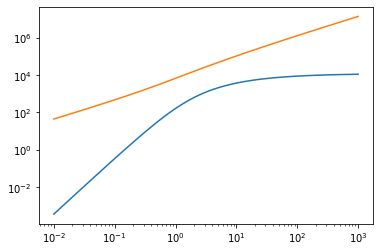

In [413]:
#define a function that goes from comoving volume to redshift

from scipy.interpolate import interp1d

zss = np.geomspace(1e-2,1000,100)
DLs = (fc.cosmo.luminosity_distance(zss)/fc.u.Mpc).decompose()
Vs = (fc.cosmo.comoving_volume(zss)/fc.u.Gpc**3).decompose()
plt.loglog(zss,Vs)
plt.loglog(zss,DLs)
zss = np.append([0],zss)
Vs = np.append([0],Vs)
DLs = np.append([0],DLs)
Vcom2z = interp1d(Vs,zss,fill_value=0)
Vcom2DL = interp1d(Vs,DLs,fill_value=0)

In [380]:
Vcom2z(0)


array(0.)

In [416]:
Tobs = 10
print(r'Exp. & $M\, [M_\odot]$ & $V_{\mathcal{G}}\, [{\rm Gpc}^3]$ & $z_{\mathcal{G}}$ & $\mathcal{R}^{10 {\rm yr}}_{90}\, [{\rm Gpc}^{-3}{\rm yr}^{-1}]$\\')
print('\hline')
toplot = ['L-8-%i'%i for i in [4,5,6,7]]+ ['C-8-%i'%i for i in [4,5,6,7]] +  ['E-8-%i'%i for i in [4,5,6,7]]
for n,k in (enumerate(toplot)):
    pars = cases[k]
    out = GSHE_results[k]
    thisname = pars[0] if n in [0,4,8] else ' '
    V_GSHE = out['GSHE_volume [Gpc^3]']
    rate_lim = '\infty' if V_GSHE ==0 else latex_exp(2.30/V_GSHE/Tobs,exp_min=(-1,1),ndec=2)
    print(thisname, '& $%s$'%latex_exp(pars[3]), 
          '&  $%s$'%latex_exp(V_GSHE,exp_min=(-1,2),ndec=2), 
          ' & $%s$'%latex_exp(Vcom2z(V_GSHE),exp_min=(-1,2)),'&  $%s$'%rate_lim,r'\\')
    if n in [3,7]: #[2,7,10]:
        print(r'\hline')
        
print(r'\hline')

Exp. & $M\, [M_\odot]$ & $V_{\mathcal{G}}\, [{\rm Gpc}^3]$ & $z_{\mathcal{G}}$ & $\mathcal{R}^{10 {\rm yr}}_{90}\, [{\rm Gpc}^{-3}{\rm yr}^{-1}]$\\
\hline
LIGO & $10^{4}$ &  $0.23\cdot 10^{-3}$  & $0.64\cdot 10^{-2}$ &  $9.92\cdot 10^{2}$ \\
  & $10^{5}$ &  $0.41\cdot 10^{-4}$  & $0.11\cdot 10^{-2}$ &  $5.54\cdot 10^{3}$ \\
  & $10^{6}$ &  $0.39\cdot 10^{-6}$  & $0.11\cdot 10^{-4}$ &  $5.93\cdot 10^{5}$ \\
  & $10^{7}$ &  $0.38\cdot 10^{-9}$  & $0.10\cdot 10^{-7}$ &  $6.10\cdot 10^{8}$ \\
\hline
CE & $10^{4}$ &  $0.44$  & $0.11$ &  $0.52$ \\
  & $10^{5}$ &  $0.05$  & $0.05$ &  $5.07$ \\
  & $10^{6}$ &  $0.13\cdot 10^{-2}$  & $0.02$ &  $1.72\cdot 10^{2}$ \\
  & $10^{7}$ &  $0.41\cdot 10^{-5}$  & $0.11\cdot 10^{-3}$ &  $5.68\cdot 10^{4}$ \\
\hline
ET & $10^{4}$ &  $0.20$  & $0.08$ &  $1.14$ \\
  & $10^{5}$ &  $0.07$  & $0.06$ &  $3.18$ \\
  & $10^{6}$ &  $0.43\cdot 10^{-2}$  & $0.02$ &  $52.89$ \\
  & $10^{7}$ &  $0.31\cdot 10^{-4}$  & $0.86\cdot 10^{-3}$ &  $7.42\cdot 10^{3}$ \\
\hline


In [417]:
Tobs = 10
print(r'Exp. & $M\, [M_\odot]$ & $V_{\mathcal{G}}\, [{\rm Gpc}^3]$ & $D_{\mathcal{G}}\, [{\rm Mpc}]$ & $\mathcal{R}^{10 {\rm yr}}_{90}\, [{\rm Gpc}^{-3}{\rm yr}^{-1}]$\\')
print('\hline')
toplot = ['L-8-%i'%i for i in [4,5,6,7]]+ ['C-8-%i'%i for i in [4,5,6,7]] +  ['E-8-%i'%i for i in [4,5,6,7]]
for n,k in (enumerate(toplot)):
    pars = cases[k]
    out = GSHE_results[k]
    thisname = pars[0] if n in [0,4,8] else ' '
    V_GSHE = out['GSHE_volume [Gpc^3]']
    rate_lim = '\infty' if V_GSHE ==0 else latex_exp(2.30/V_GSHE/Tobs,exp_min=(-1,1),ndec=2)
    print(thisname, '& $%s$'%latex_exp(pars[3]), 
          '&  $%s$'%latex_exp(V_GSHE,exp_min=(-1,2),ndec=2), 
          ' & $%s$'%latex_exp(Vcom2DL(V_GSHE),exp_min=(-1,2)),'&  $%s$'%rate_lim,r'\\')
    if n in [3,7]: #[2,7,10]:
        print(r'\hline')
        
print(r'\hline')

Exp. & $M\, [M_\odot]$ & $V_{\mathcal{G}}\, [{\rm Gpc}^3]$ & $D_{\mathcal{G}}\, [{\rm Mpc}]$ & $\mathcal{R}^{10 {\rm yr}}_{90}\, [{\rm Gpc}^{-3}{\rm yr}^{-1}]$\\
\hline
LIGO & $10^{4}$ &  $0.23\cdot 10^{-3}$  & $28.61$ &  $9.92\cdot 10^{2}$ \\
  & $10^{5}$ &  $0.41\cdot 10^{-4}$  & $5.12$ &  $5.54\cdot 10^{3}$ \\
  & $10^{6}$ &  $0.39\cdot 10^{-6}$  & $0.05$ &  $5.93\cdot 10^{5}$ \\
  & $10^{7}$ &  $0.38\cdot 10^{-9}$  & $0.46\cdot 10^{-4}$ &  $6.10\cdot 10^{8}$ \\
\hline
CE & $10^{4}$ &  $0.44$  & $523.51$ &  $0.52$ \\
  & $10^{5}$ &  $0.05$  & $232.19$ &  $5.07$ \\
  & $10^{6}$ &  $0.13\cdot 10^{-2}$  & $69.30$ &  $1.72\cdot 10^{2}$ \\
  & $10^{7}$ &  $0.41\cdot 10^{-5}$  & $0.50$ &  $5.68\cdot 10^{4}$ \\
\hline
ET & $10^{4}$ &  $0.20$  & $393.06$ &  $1.14$ \\
  & $10^{5}$ &  $0.07$  & $273.03$ &  $3.18$ \\
  & $10^{6}$ &  $0.43\cdot 10^{-2}$  & $103.41$ &  $52.89$ \\
  & $10^{7}$ &  $0.31\cdot 10^{-4}$  & $3.83$ &  $7.42\cdot 10^{3}$ \\
\hline


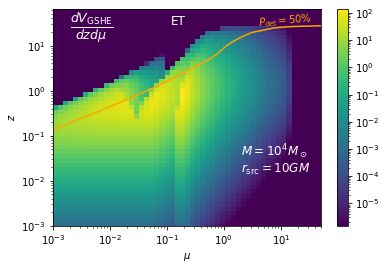

In [407]:
out = GSHE_results['E-8-4']

var = out['integrand']
vmin = max(var[var>0].min(),1e-8*var.max())
var[np.abs(var)<vmin] = vmin
# var = out['P_GSHE']
# var = out['p_det']
mus= out['mu_vals']
zs = out['z_vals']
norm=colors.LogNorm(vmin=vmin, vmax=var.max())

c = plt.pcolor(mus,zs,var,norm=norm,rasterized=True)
c2 = plt.contour(mus,zs,out['p_det'],[0.5],colors='orange',linestyles=['-'])
plt.annotate(r'$P_{\rm det}=50\%$',(4,27),color='orange',rotation = 5)
plt.annotate(r'ET',(1.2e-1,28),color='white',fontsize=12,rotation = 0)
plt.annotate(r'$\frac{dV_{\rm GSHE}}{dz d\mu}$',(2e-3,20),color='white',fontsize=18,rotation = 0)
plt.annotate(r'$M=10^4 M_\odot$',(2,3.5e-2),color='white',fontsize=12,rotation = 0)
plt.annotate(r'$r_{\rm src}=10GM$',(2,1.5e-2),color='white',fontsize=12,rotation = 0)
# plt.plot([],'-',c='orange',label=r'$P_{\rm det}=50\%$')
# plt.legend(loc='upper left')
plt.colorbar(c)#,label=r'$P_{\rm GSHE}$ [Gpc$^3$]')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$z$')
plt.xlim(1e-3,50)

plt.savefig('../plots/dV_GSHE_dzdmu.pdf',bbox_inches='tight')
plt.savefig('../plots/dV_GSHE_dzdmu.png',bbox_inches='tight')

### Plot M, rsrc

In [197]:
 open('../data/GSHE_detection_')

FileNotFoundError: [Errno 2] No such file or directory: '../data/GSHE_detection_'

In [533]:
reload(fc)

experiment = 'LIGO'
Nloops = 'all'
snr_th = 8 
M_bbh = 30

rsrcs = np.array([5, 7.5,10,15,20,25,30,35,40,50,60,90,120])
masses = np.geomspace(5e3,2e7,12) #np.array([4,5,6,7])
GSHE_vol = []


psd, file = [fc.psd_CE, fc.CE1_file] if experiment == 'CE' else [fc.psd_ET,fc.ET_file] if experiment == 'ET' else [fc.psd_ligo, fc.aligo_file]
zs = np.geomspace(0.01,60,30) if experiment in ['CE','ET'] else np.geomspace(0.01,10,30)
    
for r_src in rsrcs:
    line = []
    case_name = '%g_%s'%(r_src,Nloops)
    fc.load_data('Ups_obs_mu_min_%s.npy'%case_name)
    print(r_src,end='')
    for M_fid in masses:
        output = fc.GSHE_rates(M_bbh,psd, file,return_arrays=True,snr_th=snr_th,M_fid=M_fid,R0=R0,zs=zs)
        line.append(output['GSHE_volume [Gpc^3]'])
        print('.',end='')
    print('')
    GSHE_vol.append(line)
    
GSHE_vol = np.array(GSHE_vol)
# test.keys()

5.0........

KeyboardInterrupt: 

In [ ]:
results = {'GSHE_vol [Gpc^3]':GSHE_vol, 'r_src (r_s)': rsrcs, 'M [M_sun]':masses}
with open('../data/GSHE_%s_%s_%g_%g.pkl'%(experiment,Nloops,snr_th,M_bbh), 'wb') as f:
    pickle.dump(results, f)

('../data/GSHE_ET_all_8_30.pkl', 'wb')

0.0008226073550804172


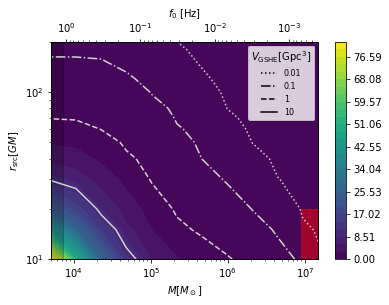

In [526]:
# from matplotlib import ticker, cm
from matplotlib.colors import LogNorm
import astropy.units as u
import astropy.constants as c

fig, ax =  plt.subplots()

var = GSHE_vol

minimum = max(var[var>0].min(),1e-5*var.max())
print(minimum)
levels = np.linspace(var.min(),var.max(),30)
# norm=colors.LogNorm(vmin=minimum, vmax=var.max())

con = ax.contourf(masses,2*rsrcs,(var),levels)#,rasterized=True)#, norm = LogNorm()) #locator=ticker.LogLocator(),)#,norm=norm)
c2 = ax.contour(masses,2*rsrcs,var,[0.01,0.1,1,10],colors='lightgray',linestyles=[':','-.','--','-'])

# ax.clabel(c2, c2.levels, inline=True, fontsize=10,fmt='%g')

for v,s in zip([0.01,0.1,1,10],[':','-.','--','-']):
    ax.plot([],s,c='k',label='%g'%v)

    
fig.colorbar(con,norm=LogNorm(),extend='max')

ax.set_xlim(5e3,1.5e7)
ax.set_ylim(1e1,200)
ax.legend(loc='upper right',title=r'$V_{\rm GSHE} [{\rm Gpc}^3]$',fontsize=8)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$M [M_\odot]$')
ax.set_ylabel(r'$r_{\rm src} [GM]$')

# ax.annotate(' last\n migration\n trap',(5e6,12),(1.3e6,25),color='white',
#              arrowprops=dict(
#                     arrowstyle='->', #connectionstyle="arc3,rad=-0.05",
#                     color="w", shrinkA=5, shrinkB=5,
#                 )
#             )

factor = 1/(8*np.pi*u.Hz*u.Msun*c.G/c.c**3).decompose()

ax2 = ax.twiny()
ax2.semilogx(factor/masses,0*masses)
ax2.set_xlim(factor/masses.min(),factor/masses.max())
ax2.set_xlabel(r'$f_{0}$ [Hz]')

newmasses = np.logspace(3.5,8,100)
ax.fill_between(newmasses[newmasses>9e6],10,20,color='red',alpha=0.5)

ax.fill_between(newmasses[factor/newmasses>1],1,1e3,color='black',alpha=0.2)
# ax.text(1e7,10,'last migration trap',rotation=90)

# t = ax.text(1.3e7, 15, " Last\n Migration\n Trap",
#             ha="center", va="center", rotation=90, size=10,
#             bbox=dict(boxstyle="round,pad=0.4", #round,rarrow
#                       fc="lightblue", ec="steelblue", lw=2))

plt.savefig('../plots/GSHE_volume_%s.pdf'%experiment,bbox_inches='tight')
plt.savefig('../plots/GSHE_volume_%s.png'%experiment,bbox_inches='tight')

In [501]:
(1/(8*np.pi*u.Msun*c.G/c.c**3)).to(u.Hz)

<Quantity 8078.12585505 Hz>

Text(0.5, 0, '$f_{10}$ [Hz]')

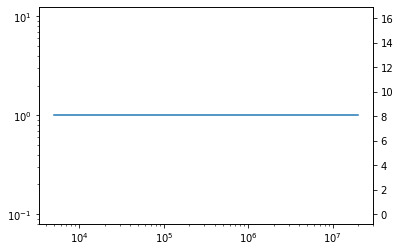

In [516]:
fig, ax =  plt.subplots()

ax.loglog(masses,masses**0)


factor = 10/(8*np.pi*u.Hz*u.Msun*c.G/c.c**3).decompose()

ax2 = ax.twiny()
ax2.semilogx(factor/masses)
ax2.set_xlabel(r'$f_{10}$ [Hz]')

### Old plots
(reading from dictionary)

In [202]:
scenario = 'C-8-'

rsrcs = [5,10,20,25,30,35,40,50]
masses = np.array([4,5,6,7])
GSHE_vol = []
for r_src in rsrcs:
    with open('../data/GSHE_detection_%i_all.pkl'%r_src, 'rb') as f:
        dat = pickle.load(f)
    GSHE_vol.append([dat[scenario+'%s'%m]['GSHE_volume [Gpc^3]'] for m in masses])
    
GSHE_vol = np.array(GSHE_vol)
# test.keys()

0.0004969238093428877


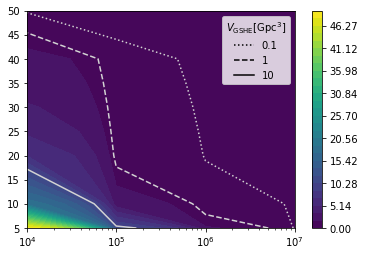

In [203]:
var = GSHE_vol

minimum = max(var[var>0].min(),1e-5*var.max())
print(minimum)
levels = np.linspace(var.min(),var.max(),30)
norm=colors.LogNorm(vmin=minimum, vmax=var.max())

c = plt.contourf(10**masses,rsrcs,var,levels)#,norm=norm)
plt.contour(10**masses,rsrcs,var,[0.1,1,10],colors='lightgray',linestyles=[':','--','-'])

for v,s in zip([0.1,1,10],[':','--','-']):
    plt.plot([],s,c='k',label='%g'%v)
    
plt.legend(loc='upper right',title=r'$V_{\rm GSHE} [{\rm Gpc}^3]$')
plt.colorbar(c)
plt.xscale('log')
# plt.yscale('log')

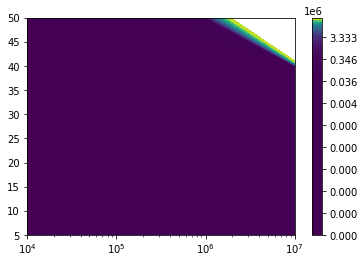

In [205]:
rate = 2.31/(10*GSHE_vol)
# minimum = max(var[var>0].min(),1e-5*var.max())
norm=colors.LogNorm(vmin=rate.min(), vmax=rate.max())
limits = np.geomspace(rate.min(),rate.max(),100)
c = plt.contourf(10**masses,rsrcs,2.31/GSHE_vol,limits)#,norm=norm)
plt.colorbar(c)
plt.xscale('log')
# plt.yscale('log')

### Discarded tables

In [57]:
print(r'Exp. & $M\, [M_\odot]$ & $V_{\mathcal{G}}\, [{\rm Gpc}^3]$ & $z_{\mathcal{G}}$\\')
print('\hline')
toplot = ['L-8-%i'%i for i in [4,5,6,7]]+ ['C-8-%i'%i for i in [4,5,6,7]]
for n,k in (enumerate(toplot)):
    pars = cases[k]
    out = GSHE_results[k]
    thisname = pars[0] if n in [0,4] else ' '
    print(thisname, '& $%s$'%latex_exp(pars[3]), 
          '&  $%s$'%latex_exp(out['GSHE_volume [Gpc^3]'],exp_min=(-1,2),ndec=2), 
          ' & $%s$'%latex_exp(Vcom2z(out['GSHE_volume [Gpc^3]']),exp_min=(-1,2)),r'\\')
    if n in [3]: #[2,7,10]:
        print(r'\hline')
        
print(r'\hline')

Exp. & $M\, [M_\odot]$ & $V_{\mathcal{G}}\, [{\rm Gpc}^3]$ & $z_{\mathcal{G}}$\\
\hline
LIGO & $10^{4}$ &  $0.09$  & $0.06$ \\
  & $10^{5}$ &  $0.98\cdot 10^{-2}$  & $0.03$ \\
  & $10^{6}$ &  $0.24\cdot 10^{-3}$  & $0.87\cdot 10^{-2}$ \\
  & $10^{7}$ &  $0.23\cdot 10^{-6}$  & $0.86\cdot 10^{-3}$ \\
\hline
CE & $10^{4}$ &  $18.22$  & $0.41$ \\
  & $10^{5}$ &  $2.38$  & $0.19$ \\
  & $10^{6}$ &  $0.37$  & $0.10$ \\
  & $10^{7}$ &  $0.26\cdot 10^{-2}$  & $0.02$ \\
\hline


In [30]:
### 
#table

print(r'Exp. & ${\rm SNR}_{\rm th}$ & $M_{\rm BBH}\, [M_\odot]$ & $M\, [M_\odot]$ [name!] & $V_{\rm GSHE}\, [{\rm Gpc}^3]$ & $\dot N_{\rm det} [{\rm yr}^{-1}]$ & $\dot N_{\rm GSHE} [{\rm yr}^{-1}]$\\')
print('\hline')
for n,k in enumerate(GSHE_results.keys()):
    pars = cases[k]
    out = GSHE_results[k]
    print(pars[0], '& $%s$'%pars[1],  '& $%s$'%pars[2], '& $%s$'%latex_exp(pars[3]), '&  $%s$'%latex_exp(out['GSHE_volume [Gpc^3]']), ' & $%s$'%latex_exp(out['rate detection [1/yr]']), '& $%s$'%latex_exp(out['rate GSHE [1/yr]']),r'\\')
    if n in [7]: #[2,7,10]:
        print(r'\hline')
        
print(r'\hline')

Exp. & ${\rm SNR}_{\rm th}$ & $M_{\rm BBH}\, [M_\odot]$ & $M\, [M_\odot]$ [name!] & $V_{\rm GSHE}\, [{\rm Gpc}^3]$ & $\dot N_{\rm det} [{\rm yr}^{-1}]$ & $\dot N_{\rm GSHE} [{\rm yr}^{-1}]$\\
\hline
LIGO & $8$ & $60$ & $10^{4}$ &  $0.44$  & $2.96\cdot 10^{2}$ & $1.33\cdot 10^{1}$ \\
LIGO & $8$ & $20$ & $10^{4}$ &  $0.78\cdot 10^{-1}$  & $3.39\cdot 10^{1}$ & $2.34$ \\
LIGO & $8$ & $3$ & $10^{4}$ &  $0.14\cdot 10^{-2}$  & $0.47$ & $0.42\cdot 10^{-1}$ \\
LIGO & $8$ & $60$ & $10^{5}$ &  $0.40\cdot 10^{-1}$  & $2.96\cdot 10^{2}$ & $1.21$ \\
LIGO & $8$ & $60$ & $10^{6}$ &  $0.16\cdot 10^{-2}$  & $2.96\cdot 10^{2}$ & $0.49\cdot 10^{-1}$ \\
LIGO & $1$ & $60$ & $10^{4}$ &  $2.48$  & $1.21\cdot 10^{4}$ & $7.44\cdot 10^{1}$ \\
LIGO & $1$ & $60$ & $10^{5}$ &  $0.35$  & $1.21\cdot 10^{4}$ & $1.06\cdot 10^{1}$ \\
LIGO & $1$ & $60$ & $10^{6}$ &  $0.27\cdot 10^{-2}$  & $1.21\cdot 10^{4}$ & $0.80\cdot 10^{-1}$ \\
\hline
CE & $8$ & $60$ & $10^{4}$ &  $4.97\cdot 10^{1}$  & $2.40\cdot 10^{4}$ & $1.49\cdot

In [79]:
masses_v = [1e4,1e5,1e6,1e7]

VC1 = [GSHE_results[k]['GSHE_volume [Gpc^3]'] for k in ['C-1-4', 'C-1-5', 'C-1-6','C-1-7']]
plt.loglog(masses_v,VC1,'*--',label='CE, SNR>1')

VC8 = [GSHE_results[k]['GSHE_volume [Gpc^3]'] for k in ['C-8-4', 'C-8-5', 'C-8-6','C-8-7']]
plt.loglog(masses_v,VC8,'*-',label='CE, SNR>8')



VL1 = [GSHE_results[k]['GSHE_volume [Gpc^3]'] for k in ['L-1-4', 'L-1-5', 'L-1-6','L-1-7']]
plt.loglog(masses_v,VL1,'+--',label='LIGO, SNR>1')

VL8 = [GSHE_results[k]['GSHE_volume [Gpc^3]'] for k in ['L-8-4', 'L-8-5', 'L-8-6','L-8-7']]
plt.loglog(masses_v,VL8,'+-',label='LIGO, SNR>8')


plt.grid(alpha=0.3)

plt.xlabel('$M \, [M_\odot]$')
plt.ylabel(r'$V_{\rm GSHE}$ [Gpc]')
plt.legend()

KeyError: 'C-1-4'

In [50]:
masses_v = [1e4,1e5,1e6,1e7]

VC1 = [GSHE_results[k]['GSHE_volume [Gpc^3]'] for k in ['C-1-4', 'C-1-5', 'C-1-6','C-1-7']]
# plt.loglog(masses_v,(VC1),'b*--',alpha=0.6)#,label='CE, SNR>1'

VC8 = [GSHE_results[k]['GSHE_volume [Gpc^3]'] for k in ['C-8-4', 'C-8-5', 'C-8-6','C-8-7']]
plt.loglog(masses_v,(VC8),'b*-')#,label='CE, SNR>8')

plt.annotate('CE',(5e5,10),c='b',fontsize=15)


VL1 = [GSHE_results[k]['GSHE_volume [Gpc^3]'] for k in ['L-1-4', 'L-1-5', 'L-1-6','L-1-7']]
# plt.loglog(masses_v,(VL1),'k+--',alpha=0.6)#,label='LIGO, SNR>1'

VL8 = [GSHE_results[k]['GSHE_volume [Gpc^3]'] for k in ['L-8-4', 'L-8-5', 'L-8-6','L-8-7']]
plt.loglog(masses_v,(VL8),'k+-')#,label='LIGO, SNR>8')

plt.annotate('LIGO',(6e5,0.015),c='k',fontsize=15)

plt.grid(alpha=0.3)

plt.plot([],'k--',label='SNR>1',alpha=0.6)
plt.plot([],'k-',label='SNR>8')

plt.xlabel('$M \, [M_\odot]$',fontsize=13)
plt.ylabel(r'$V_{\rm GSHE}$ [Gpc$^3$]',fontsize=13)

# plt.ylim(1e-2,1)
# legend = plt.legend(loc='lower left',title=r'$r_{\rm src}=10 GM$',fontsize=13)
plt.setp(legend.get_title(),fontsize='13')
plt.ylim(1e-4,1e2)

plt.annotate('PRELIMINARY!',(1.1e4,1e-3),fontsize=14,rotation=15,color='red')

# plt.savefig('../plots/GSHE_volume_talk.png')
# plt.savefig('../plots/GSHE_volume_talk.pdf',bbox_inches='tight')

KeyError: 'C-1-4'

In [49]:
masses_v = [1e4,1e5,1e6,1e7]

VC1 = [GSHE_results[k]['GSHE_volume [Gpc^3]'] for k in ['C-1-4', 'C-1-5', 'C-1-6','C-1-7']]
plt.loglog(masses_v,Vcom2z(VC1),'b*--',alpha=0.6)#,label='CE, SNR>1'

VC8 = [GSHE_results[k]['GSHE_volume [Gpc^3]'] for k in ['C-8-4', 'C-8-5', 'C-8-6','C-8-7']]
plt.loglog(masses_v,Vcom2z(VC8),'b*-')#,label='CE, SNR>8')

plt.annotate('CE',(5e5,0.3),c='b',fontsize=15)


VL1 = [GSHE_results[k]['GSHE_volume [Gpc^3]'] for k in ['L-1-4', 'L-1-5', 'L-1-6','L-1-7']]
plt.loglog(masses_v,Vcom2z(VL1),'k+--',alpha=0.6)#,label='LIGO, SNR>1'

VL8 = [GSHE_results[k]['GSHE_volume [Gpc^3]'] for k in ['L-8-4', 'L-8-5', 'L-8-6','L-8-7']]
plt.loglog(masses_v,Vcom2z(VL8),'k+-')#,label='LIGO, SNR>8')

plt.annotate('LIGO',(6e5,0.03),c='k',fontsize=15)

plt.grid(alpha=0.3)

plt.plot([],'k--',label='SNR>1',alpha=0.6)
plt.plot([],'k-',label='SNR>8')

plt.xlabel('$M \, [M_\odot]$',fontsize=13)
plt.ylabel(r'$z_{\rm eff}$',fontsize=13)
plt.ylim(1e-2,1)
legend = plt.legend(loc='lower left',title=r'$r_{\rm src}=10 GM$',fontsize=13)
plt.setp(legend.get_title(),fontsize='13')

# plt.savefig('../plots/GSHE_zeff_talk.png')
# plt.savefig('../plots/GSHE_zeff_talk.pdf',bbox_inches='tight')

KeyError: 'C-1-4'

In [34]:
GSHE_results['C-1-7'].keys()

dict_keys(['SNR_th', 'M_fid', 'psd_file', 'M_bbh', 'GSHE_volume [Gpc^3]', 'R0', 'rate GSHE [1/yr]', 'rate detection [1/yr]', 'mu_vals', 'z_vals', 'integrand', 'P_GSHE', 'p_det', 'dVzdz'])

In [35]:
var

array([[9.31402675e-02, 9.54043057e-02, 9.73103948e-02, ...,
        1.40408477e-06, 1.40408477e-06, 1.40408477e-06],
       [1.50222389e-01, 1.56825210e-01, 1.62391236e-01, ...,
        1.40408477e-06, 1.40408477e-06, 1.40408477e-06],
       [2.20774102e-01, 2.39838165e-01, 2.56013495e-01, ...,
        1.40408477e-06, 1.40408477e-06, 1.40408477e-06],
       ...,
       [1.40408477e-06, 1.40408477e-06, 1.40408477e-06, ...,
        1.40408477e-06, 1.40408477e-06, 1.40408477e-06],
       [1.40408477e-06, 1.40408477e-06, 1.40408477e-06, ...,
        1.40408477e-06, 1.40408477e-06, 1.40408477e-06],
       [1.40408477e-06, 1.40408477e-06, 1.40408477e-06, ...,
        1.40408477e-06, 1.40408477e-06, 1.40408477e-06]])

In [311]:
out.keys()

dict_keys(['SNR_th', 'M_fid', 'psd_file', 'M_bbh', 'GSHE_volume [Gpc^3]', 'R0', 'rate GSHE [1/yr]', 'rate detection [1/yr]', 'mu_vals', 'z_vals', 'integrand', 'P_GSHE', 'p_det', 'dVzdz'])

(0.001, 50)

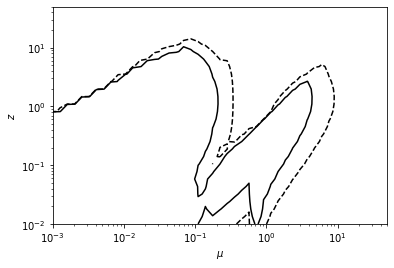

In [328]:
out = GSHE_results['C-8-5']

var = out['integrand']
vmin = max(var[var>0].min(),1e-8*var.max())
var[np.abs(var)<vmin] = vmin
# var = out['P_GSHE']
# var = out['p_det']
mus= out['mu_vals']
zs = out['z_vals']
norm=colors.LogNorm(vmin=vmin, vmax=var.max())

norm=colors.LogNorm(vmin=vmin, vmax=var.max())
# c = plt.pcolor(mus,zs,var,norm=norm,rasterized=True)

levels = np.array([0.1,0.9])/out['GSHE_volume [Gpc^3]']
c2 = plt.contour(mus,zs,var,levels,linestyles=['--','-'],colors='k')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$z$')
plt.xlim(1e-3,50)

Text(0, 0.5, '$z$')

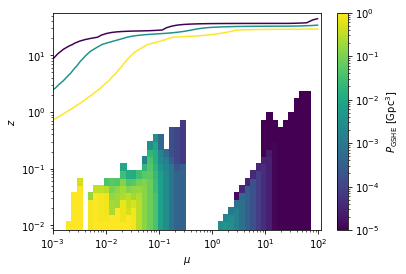

In [169]:
out = GSHE_results['C-1-7']

var = out['integrand']
var = out['P_GSHE']
# var = out['p_det']
mus= out['mu_vals']
zs = out['z_vals']
minimum = max(var[var>0].min(),1e-5*var.max())
norm=colors.LogNorm(vmin=minimum, vmax=var.max())

c = plt.pcolor(mus,zs,var,norm=norm,rasterized=True)
c2 = plt.contour(mus,zs,out['p_det'],[1e-1,0.5,0.9])

plt.colorbar(c,label=r'$P_{\rm GSHE}$ [Gpc$^3$]')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$z$')


### A-LIGO

Result is in Gpc^3/y, need to multiply by R0!

Assumes M=1e4 M_sun, R_src = 5r_s, f = 1, M_tot = 60

In [24]:
from matplotlib import colors

In [80]:
reload(fc)
snr_th = 8
M_bbh = 60
M_fid = 1e4
R0 = 30
experiment='LIGO'

ligo_out = fc.GSHE_rates(M_bbh,fc.psd_ligo, fc.aligo_file,return_arrays=True,snr_th=snr_th,M_fid=M_fid,R0=R0)

/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:115: RuntimeWarning: divide by zero encountered in divide
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:115: RuntimeWarning: invalid value encountered in divide
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:115: RuntimeWarning: invalid value encountered in exp
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))


In [81]:
out = ligo_out
print('aLIGO rates: total %g, GSHE %g [1/yr]'%(out['rate detection [1/yr]'], out['rate GSHE [1/yr]']))

aLIGO rates: total 258.542, GSHE 32.5702 [1/yr]


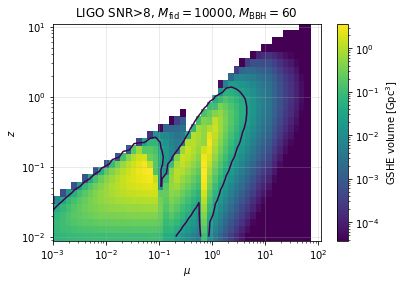

In [82]:
output = ligo_out
var = output['integrand']
mus= output['mu_vals']
zs = output['z_vals']
minimum = max(var[var>0].min(),1e-5*var.max())
norm=colors.LogNorm(vmin=minimum, vmax=var.max())

c = plt.pcolor(mus,zs,var,norm=norm,rasterized=True)
c2 = plt.contour(mus,zs,var,[1/R0])
plt.colorbar(c,label='GSHE volume [Gpc$^3$]')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$z$')

plt.title(r'%s SNR>%g, $M_{\rm fid}=%g, M_{\rm BBH}=%g$'%(experiment,snr_th,M_fid,M_bbh))
plt.grid(alpha=0.3)
plt.savefig('../plots/GSHE_volume_%s_SNRth=%g_M_fid=%g_M_bbh=%g.png'%(experiment,snr_th,M_fid,M_bbh))

Text(0.5, 1.0, 'aLIGO')

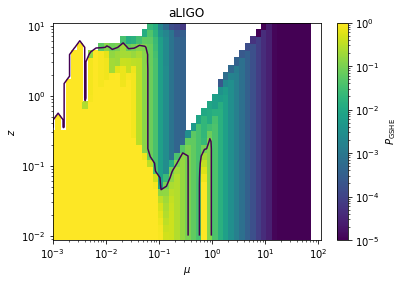

In [28]:
output = ligo_out
var = output['P_GSHE']
mus= output['mu_vals']
zs = output['z_vals']
minimum = max(var[var>0].min(),1e-5*var.max())
norm=colors.LogNorm(vmin=minimum, vmax=var.max())

c = plt.pcolor(mus,zs,var,norm=norm)
c2 = plt.contour(mus,zs,var,[0.1])
plt.colorbar(c,label=r'$P_{\rm GSHE}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$z$')
plt.title('aLIGO')

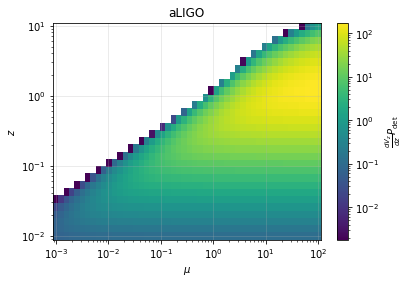

In [29]:
output = ligo_out
var = output['dVzdz']*output['p_det']
mus= output['mu_vals']
zs = output['z_vals']
minimum = max(var[var>0].min(),1e-5*var.max())
norm=colors.LogNorm(vmin=minimum, vmax=var.max())

c = plt.pcolor(mus,zs,var,norm=norm)
# c2 = plt.contour(mus,zs,integrand,[1])
plt.colorbar(c,label=r'$\frac{dV_z}{dz}P_{\rm det}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$z$')
plt.title('aLIGO')
plt.grid(alpha=0.3)

In [30]:
for x in [p_det,btmin,P_GSHE,dVzdz]:
    print(len(x[:,0]),len(x[0,:]))

NameError: name 'p_det' is not defined

### CE

In [26]:
reload(fc)
snr_th = 8
M_bbh = 60
M_fid = 1e4
zs = np.geomspace(0.01,50,30)
R0=R0
experiment='CE'

CE_out = fc.GSHE_rates(M_bbh,fc.CE_psd, fc.CE1_file,return_arrays=True,snr_th=snr_th,M_fid=M_fid,zs=zs,R0=R0)

/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:115: RuntimeWarning: divide by zero encountered in divide
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:115: RuntimeWarning: invalid value encountered in divide
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))
/home/miguel/code/GSHE/scripts/../GSHEWaveform/forecast.py:115: RuntimeWarning: invalid value encountered in exp
  F_gshe = np.exp(2*np.pi*1j*f0_fid/(fs))


In [27]:
out = CE_out
print('CE rates: total %g, GSHE %g [1/yr]'%(out['rate detection [1/yr]'], out['rate GSHE [1/yr]']))

CE rates: total 22324.8, GSHE 3554.38 [1/yr]


In [28]:
out = CE_out
print('CE rates: total %g, GSHE %g [1/yr]'%(out['rate detection [1/yr]'], out['rate GSHE [1/yr]']))

CE rates: total 22324.8, GSHE 3554.38 [1/yr]


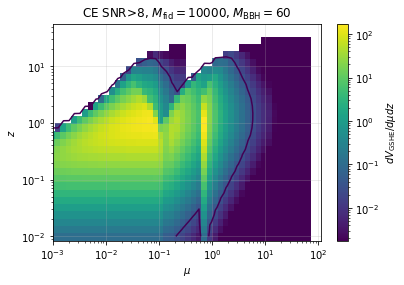

In [30]:
output = CE_out
var = output['integrand']
mus= output['mu_vals']
zs = output['z_vals']
minimum = max(var[var>0].min(),1e-5*var.max())
norm=colors.LogNorm(vmin=minimum, vmax=var.max())

c = plt.pcolor(mus,zs,var,norm=norm,rasterized=True)
c2 = plt.contour(mus,zs,var,[1/R0])
plt.colorbar(c,label=r'$d V_{\rm GSHE}/d\mu dz$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$z$')
plt.title(r'%s SNR>%g, $M_{\rm fid}=%g, M_{\rm BBH}=%g$'%(experiment,snr_th,M_fid,M_bbh))
plt.grid(alpha=0.3)
plt.savefig('../plots/GSHE_volume_%s_SNRth=%g_M_fid=%g_M_bbh=%g.png'%(experiment,snr_th,M_fid,M_bbh))

Text(0.5, 1.0, 'CE')

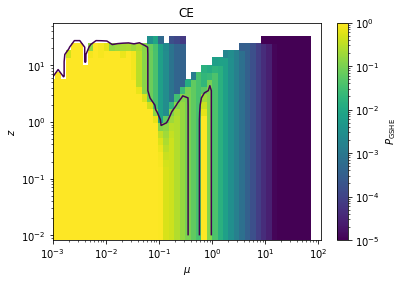

In [75]:
output = CE_out
var = output['P_GSHE']
mus= output['mu_vals']
zs = output['z_vals']
minimum = max(var[var>0].min(),1e-5*var.max())
norm=colors.LogNorm(vmin=minimum, vmax=var.max())

c = plt.pcolor(mus,zs,var,norm=norm)
c2 = plt.contour(mus,zs,var,[0.1])
plt.colorbar(c,label=r'$P_{\rm GSHE}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$z$')
plt.title('CE')

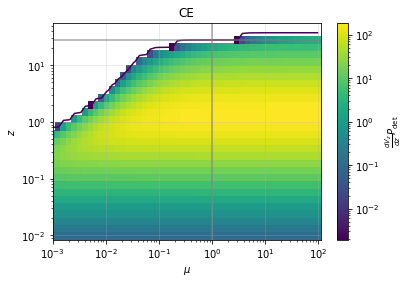

In [76]:
output = CE_out
var = output['dVzdz']*output['p_det']
mus= output['mu_vals']
zs = output['z_vals']
minimum = max(var[var>0].min(),1e-5*var.max())
norm=colors.LogNorm(vmin=minimum, vmax=var.max())

c = plt.pcolor(mus,zs,var,norm=norm)
c2 = plt.contour(mus,zs,output['p_det'],[0.001])
plt.colorbar(c,label=r'$\frac{dV_z}{dz}P_{\rm det}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$z$')
plt.title('CE')
plt.grid(alpha=0.3)
plt.axvline(1,color='gray',alpha=0.7)
plt.axhline(28,color='gray',alpha=0.7)

In [77]:
#Consistent with CE horizon, figure 2 in Chen+17
#seems consistent with 3G science book, where z(60Msun) ~ 30 at SNR=3, but for a detector network
cosmo.comoving_distance(28)

NameError: name 'cosmo' is not defined

In [38]:
zs = np.geomspace(0.1,1000)
plt.loglog(zs,cosmo.differential_comoving_volume(zs))
plt.loglog(zs,cosmo.luminosity_distance(zs))

NameError: name 'cosmo' is not defined